In [2]:
import requests
import json

def analyzeText(url):
    api_url = "http://gateway-a.watsonplatform.net/calls/url/URLGetRankedNamedEntities"
    api_key = '3d0b6858f7ef32fdf27ad402f4a9c270c9685d84'
    headers = {
        "Accept": "application/json"
    }
    parameters = {
        'outputMode': 'json',
        'apikey' : api_key,
        'sentiment' : 1,
        'knowledgeGraph': 0,
        'url': url,
        'disambiguate': 0
    }
    resp = requests.post(api_url, params=parameters, headers=headers)
    data = json.loads(resp.text)
    
    return data


In [3]:
text_url = 'https://www.washingtonpost.com/politics/rubio-endures-an-assault-in-a-rollicking-republican-debate/2016/02/06/d8a9bd60-cc5b-11e5-a7b2-5a2f824b02c9_story.html'

results = analyzeText(text_url) 

In [4]:
results.keys()

[u'status', u'totalTransactions', u'language', u'url', u'entities', u'usage']

In [5]:
results["entities"]

[{u'count': u'20',
  u'relevance': u'0.940885',
  u'sentiment': {u'mixed': u'1', u'score': u'0.0465971', u'type': u'positive'},
  u'text': u'Donald Trump',
  u'type': u'Person'},
 {u'count': u'16',
  u'relevance': u'0.722885',
  u'sentiment': {u'score': u'-0.590129', u'type': u'negative'},
  u'text': u'Marco Rubio',
  u'type': u'Person'},
 {u'count': u'9',
  u'relevance': u'0.472516',
  u'sentiment': {u'score': u'-0.605079', u'type': u'negative'},
  u'text': u'Jeb Bush',
  u'type': u'Person'},
 {u'count': u'9',
  u'relevance': u'0.425278',
  u'sentiment': {u'mixed': u'1', u'score': u'-0.419991', u'type': u'negative'},
  u'text': u'Gov. Chris Christie',
  u'type': u'Person'},
 {u'count': u'13',
  u'relevance': u'0.419378',
  u'sentiment': {u'score': u'-0.308842', u'type': u'negative'},
  u'text': u'Sen. Ted Cruz',
  u'type': u'Person'},
 {u'count': u'5',
  u'relevance': u'0.343615',
  u'sentiment': {u'mixed': u'1', u'score': u'-0.322349', u'type': u'negative'},
  u'text': u'New Hampshir

In [7]:
import pandas
from pandas.io.json import json_normalize

df = json_normalize(results["entities"])
df.head(5)

,count,relevance,sentiment.mixed,sentiment.score,sentiment.type,text,type
0,20,0.940885,1,0.0465971,positive,Donald Trump,Person
1,16,0.722885,NaN,-0.590129,negative,Marco Rubio,Person
2,9,0.472516,NaN,-0.605079,negative,Jeb Bush,Person
3,9,0.425278,1,-0.419991,negative,Gov. Chris Christie,Person
4,13,0.419378,NaN,-0.308842,negative,Sen. Ted Cruz,Person


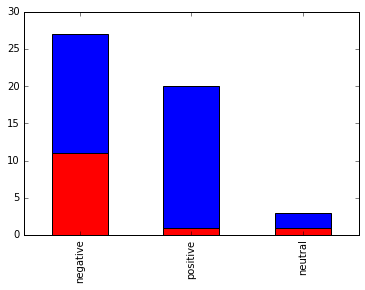

In [18]:
%matplotlib inline
plot1 = df["sentiment.type"].value_counts().plot(kind='bar')
isPerson = (df["type"] == 'Person')
persons = df[isPerson]
persons["sentiment.type"].value_counts().plot(kind='bar', color='Red', ax=plot1)

In [21]:
df.dtypes

count              object
relevance          object
sentiment.mixed    object
sentiment.score    object
sentiment.type     object
text               object
type               object
dtype: object

In [24]:
df["count"] = pandas.to_numeric(df["count"])
df["relevance"] = pandas.to_numeric(df["relevance"])
df["sentiment.score"] = pandas.to_numeric(df["sentiment.score"])

In [25]:
df.dtypes

count                int64
relevance          float64
sentiment.mixed     object
sentiment.score    float64
sentiment.type      object
text                object
type                object
dtype: object

In [26]:
df.describe()

,count,relevance,sentiment.score
count,50.000000,50.000000,30.000000
mean,2.820000,0.247908,-0.395635
std,3.977949,0.140808,0.242585
min,1.000000,0.156684,-0.878812
25%,1.000000,0.176470,-0.523245
50%,1.000000,0.207045,-0.441082
75%,2.000000,0.238866,-0.310560
max,20.000000,0.940885,0.245415


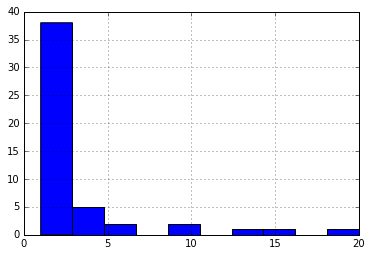

In [27]:
df["count"].hist()

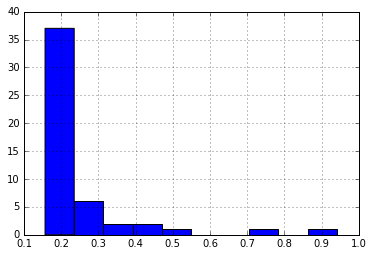

In [28]:
df["relevance"].hist()

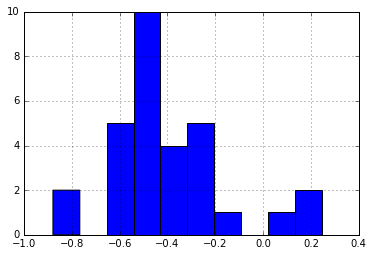

In [33]:
df["sentiment.score"].hist()

In [50]:
# And not let's rewrite our function to return directly a dataframe

import requests
import json
import pandas
from pandas.io.json import json_normalize


def analyzeText2(url):
    api_url = "http://gateway-a.watsonplatform.net/calls/url/URLGetRankedNamedEntities"
    api_key = '3d0b6858f7ef32fdf27ad402f4a9c270c9685d84'
    headers = {
        "Accept": "application/json"
    }
    parameters = {
        'outputMode': 'json',
        'apikey' : api_key,
        'sentiment' : 1,
        'knowledgeGraph': 0,
        'url': url,
        'disambiguate': 0
    }
    resp = requests.post(api_url, params=parameters, headers=headers)
    data = json.loads(resp.text)
    
    # We get only the "entities" list since it contains
    # the data that we care about
    df = json_normalize(data["entities"])
    
    # We do a little bit of housecleaning and define 
    # proper data types for the data frame column
    df["count"] = pandas.to_numeric(df["count"])
    df["relevance"] = pandas.to_numeric(df["relevance"])
    df["sentiment.score"] = pandas.to_numeric(df["sentiment.score"])
    
    # We limit the results to be only entities of type person
    isPerson = (df["type"] == 'Person')
    persons = df[isPerson]
    
    results = persons.drop('type', axis=1)
    
    return results

In [69]:
text_url = 'http://www.nytimes.com/2016/02/08/us/politics/marco-rubio-comes-back-swinging-after-difficult-debate.html?_r=0'
results = analyzeText2(text_url) 

results

,count,relevance,sentiment.mixed,sentiment.score,sentiment.type,text
0,22,0.867542,1,-0.295300,negative,Senator Marco Rubio
1,8,0.318773,1,-0.235099,negative,Gov. Chris Christie
3,6,0.222652,NaN,-0.644698,negative,President Obama
7,2,0.134794,NaN,NaN,neutral,Senator Ted Cruz
10,3,0.126808,NaN,-0.486379,negative,Jeb Bush
14,2,0.117701,NaN,-0.283075,negative,Senator Lindsey Graham
19,2,0.107923,NaN,0.245939,positive,Todd Harris
23,1,0.102471,NaN,NaN,neutral,Andrea Almquist
25,1,0.098651,NaN,NaN,neutral,Eddie Vale
27,1,0.094604,NaN,NaN,neutral,Mark Nemecek


0 Senator Marco Rubio 0.867542
1 Gov. Chris Christie 0.318773
3 President Obama 0.222652
7 Senator Ted Cruz 0.134794
10 Jeb Bush 0.126808
14 Senator Lindsey Graham 0.117701
19 Todd Harris 0.107923
23 Andrea Almquist 0.102471
25 Eddie Vale 0.0986507
27 Mark Nemecek 0.0946037
28 Donald J. Trump 0.0870159


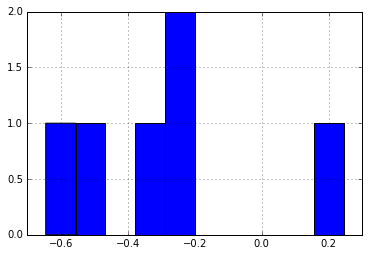

In [56]:
results["sentiment.score"].hist()


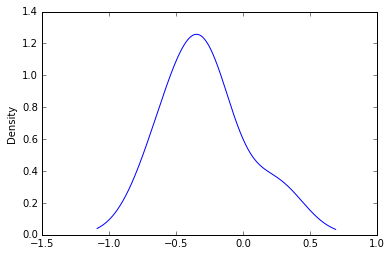

In [57]:
results["sentiment.score"].plot(kind='kde')

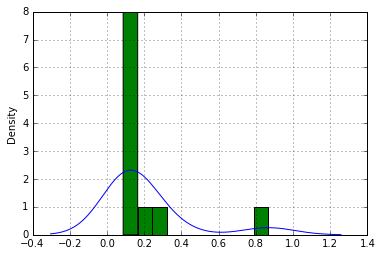

In [62]:
plt1 = results["relevance"].plot(kind='kde')
results["relevance"].hist(ax=plt1)

### Database integration

Now we will work towards building a database for storing the results that we get back from the Alchemy API.

In [63]:
import MySQLdb as mdb
import sys

# Connect to the MySQL database
con = mdb.connect(host = 'localhost', 
                  user = 'root', 
                  passwd = 'dwdstudent2015', 
                  charset='utf8', use_unicode=True);

# Query to create a database
db_name = 'News'
create_db_query = "CREATE DATABASE IF NOT EXISTS {0} DEFAULT CHARACTER SET 'utf8'".format(db_name)

# Create a database
cursor = con.cursor()
cursor.execute(create_db_query)
cursor.close()

In [86]:
# Now we will create a table to store the URLs and the entities
# extracted from these URLs

cursor = con.cursor()
table_name = 'Entities'
# Create a table
# The {0} and {1} are placeholders for the parameters in the format(....) statement
create_table_query = '''CREATE TABLE IF NOT EXISTS {0}.{1} 
                                (url varchar(250), 
                                entity varchar(250),
                                count varchar(250),
                                relevance varchar(250),
                                sentiment varchar(250)
                                )'''.format(db_name, table_name)
cursor.execute(create_table_query)
cursor.close()

In [87]:
# This is the query template for entering entities, URLs, and other
# data into our database

def insertInDB(url):
    query_template = '''INSERT INTO 
        News.Entities(url, entity, count, relevance, sentiment) 
        VALUES (%s, %s, %s, %s, %s)'''

    cursor = con.cursor()
    
    # We get the entities from Alchemy API
    # in the form of a DataFrame
    results = analyzeText2(url) 
    
    # We iterate over the rows of the Dataframe
    # using the iterrows() command.
    for i, row in results.iterrows():
        # The row variable contains the elements of a row
        # and each field is accessible as in dictionaries
        entity = str(row["text"])
        count = str(row["count"])
        relevance = str(row["relevance"])
        sentiment = str(row["sentiment.score"])
        print (url, entity, count, relevance, sentiment)

        query_parameters = (url, entity, count, relevance, sentiment)
        cursor.execute(query_template, query_parameters)

    con.commit()
    cursor.close()

In [89]:
urls = [
 'http://www.nytimes.com/2016/02/08/us/politics/marco-rubio-comes-back-swinging-after-difficult-debate.html?_r=0',
 'http://www.salon.com/2016/02/07/its_almost_over_for_hillary_this_election_is_a_mass_insurrection_against_a_rigged_system/',
 'http://www.cnn.com/2016/02/07/politics/new-hampshire-2016-candidates-primary-state-of-the-union/',
 'https://www.washingtonpost.com/politics/why-wont-clinton-release-the-transcripts-of-those-paid-speeches/2016/02/07/e76bdea0-cdc3-11e5-b2bc-988409ee911b_story.html'   
 'http://www.nbcnews.com/storyline/flint-water-crisis/hillary-clinton-what-happened-flint-immoral-n513296'
]

for url in urls:
    insertInDB(url)

('http://www.nytimes.com/2016/02/08/us/politics/marco-rubio-comes-back-swinging-after-difficult-debate.html?_r=0', 'Senator Marco Rubio', '22', '0.867542', '-0.2953')
('http://www.nytimes.com/2016/02/08/us/politics/marco-rubio-comes-back-swinging-after-difficult-debate.html?_r=0', 'Gov. Chris Christie', '8', '0.318773', '-0.235099')
('http://www.nytimes.com/2016/02/08/us/politics/marco-rubio-comes-back-swinging-after-difficult-debate.html?_r=0', 'President Obama', '6', '0.222652', '-0.644698')
('http://www.nytimes.com/2016/02/08/us/politics/marco-rubio-comes-back-swinging-after-difficult-debate.html?_r=0', 'Senator Ted Cruz', '2', '0.134794', 'nan')
('http://www.nytimes.com/2016/02/08/us/politics/marco-rubio-comes-back-swinging-after-difficult-debate.html?_r=0', 'Jeb Bush', '3', '0.126808', '-0.48638')
('http://www.nytimes.com/2016/02/08/us/politics/marco-rubio-comes-back-swinging-after-difficult-debate.html?_r=0', 'Senator Lindsey Graham', '2', '0.117701', '-0.283075')
('http://www.ny

IndexError: list index out of range

In [90]:
import pandas as pd

cur = con.cursor(mdb.cursors.DictCursor)
cur.execute("SELECT * FROM News.Entities")
rows = cur.fetchall()
df_from_sql = pd.DataFrame(list(rows))
df_from_sql

,count,entity,relevance,sentiment,url
0,22,Senator Marco Rubio,0.867542,-0.2953,http://www.nytimes.com/2016/02/08/us/politics/...
1,8,Gov. Chris Christie,0.318773,-0.235099,http://www.nytimes.com/2016/02/08/us/politics/...
2,6,President Obama,0.222652,-0.644698,http://www.nytimes.com/2016/02/08/us/politics/...
3,2,Senator Ted Cruz,0.134794,nan,http://www.nytimes.com/2016/02/08/us/politics/...
4,3,Jeb Bush,0.126808,-0.48638,http://www.nytimes.com/2016/02/08/us/politics/...
5,2,Senator Lindsey Graham,0.117701,-0.283075,http://www.nytimes.com/2016/02/08/us/politics/...
6,2,Todd Harris,0.107923,0.24594,http://www.nytimes.com/2016/02/08/us/politics/...
7,1,Andrea Almquist,0.102471,nan,http://www.nytimes.com/2016/02/08/us/politics/...
8,1,Eddie Vale,0.0986507,nan,http://www.nytimes.com/2016/02/08/us/politics/...
9,1,Mark Nemecek,0.0946037,nan,http://www.nytimes.com/2016/02/08/us/politics/...
